In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel(r'C:\Users\jyoti\OneDrive\Desktop\AirQualityUCI.xlsx')

In [ ]:
df.head

<bound method NDFrame.head of            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    11

In [ ]:
df.shape

(9357, 15)

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install prophet

In [ ]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
#Combinimg Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), dayfirst=True, errors='coerce')

In [ ]:
df.set_index('Datetime', inplace=True)

In [ ]:
df.head

<bound method NDFrame.head of                           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  \
Datetime                                                                  
2004-10-03 18:00:00 2004-03-10  18:00:00     2.6      1360.00       150   
2004-10-03 19:00:00 2004-03-10  19:00:00     2.0      1292.25       112   
2004-10-03 20:00:00 2004-03-10  20:00:00     2.2      1402.00        88   
2004-10-03 21:00:00 2004-03-10  21:00:00     2.2      1375.50        80   
2004-10-03 22:00:00 2004-03-10  22:00:00     1.6      1272.25        51   
...                        ...       ...     ...          ...       ...   
2005-04-04 10:00:00 2005-04-04  10:00:00     3.1      1314.25      -200   
2005-04-04 11:00:00 2005-04-04  11:00:00     2.4      1162.50      -200   
2005-04-04 12:00:00 2005-04-04  12:00:00     2.4      1142.00      -200   
2005-04-04 13:00:00 2005-04-04  13:00:00     2.1      1002.50      -200   
2005-04-04 14:00:00 2005-04-04  14:00:00     2.2      1070.75      -20

In [ ]:
# Droping original Date and Time columns
df.drop(columns=['Date', 'Time'], inplace=True)

In [ ]:
df.head

<bound method NDFrame.head of                      CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                       
2004-10-03 18:00:00     2.6      1360.00       150  11.881723        1045.50   
2004-10-03 19:00:00     2.0      1292.25       112   9.397165         954.75   
2004-10-03 20:00:00     2.2      1402.00        88   8.997817         939.25   
2004-10-03 21:00:00     2.2      1375.50        80   9.228796         948.25   
2004-10-03 22:00:00     1.6      1272.25        51   6.518224         835.50   
...                     ...          ...       ...        ...            ...   
2005-04-04 10:00:00     3.1      1314.25      -200  13.529605        1101.25   
2005-04-04 11:00:00     2.4      1162.50      -200  11.355157        1027.00   
2005-04-04 12:00:00     2.4      1142.00      -200  12.374538        1062.50   
2005-04-04 13:00:00     2.1      1002.50      -200   9.547187         960.50   
2005-04-04

In [ ]:
print("🔍 Columns with negative values and their counts:")
print((df < 0).sum())

🔍 Columns with negative values and their counts:
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 380
RH                366
AH                366
dtype: int64


In [ ]:
# Replace negative values with NaN
df[df < 0] = np.nan

# Fill NaN values using backward fill
df.fillna(method='bfill', inplace=True)

# If any NaNs still exist at the end after bfill, forward fill them
df.fillna(method='ffill', inplace=True)

# Check if any NaNs are left
print("Remaining NaN values per column:")
print(df.isna().sum())

Remaining NaN values per column:
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [ ]:
print("🔍 Columns with negative values and their counts:")
print((df < 0).sum())

🔍 Columns with negative values and their counts:
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [ ]:
df.shape

(9357, 13)

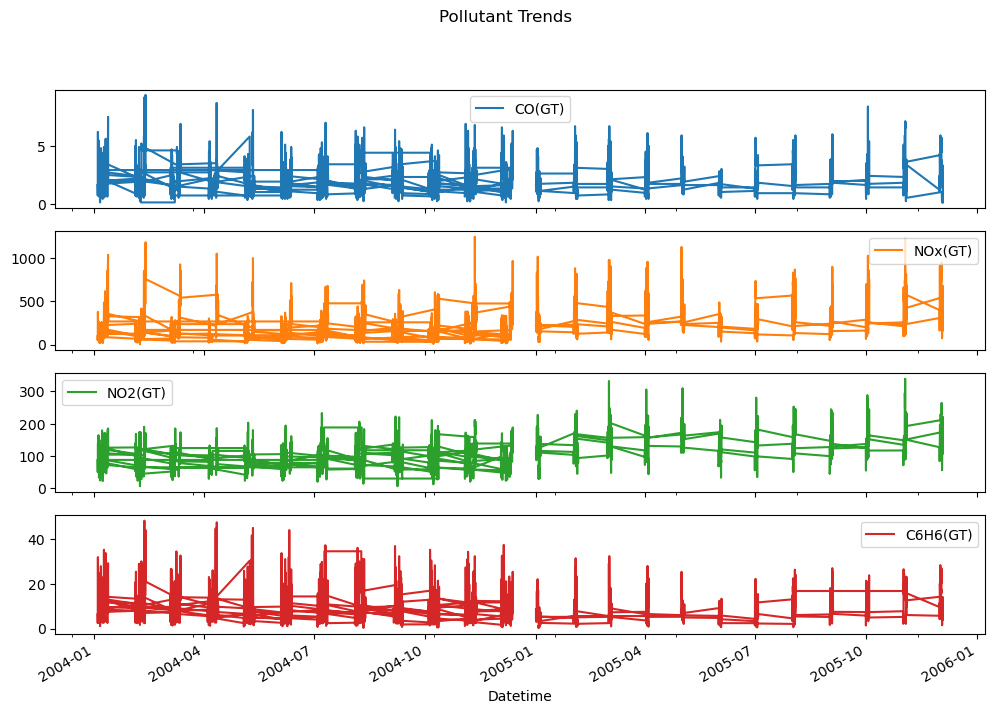

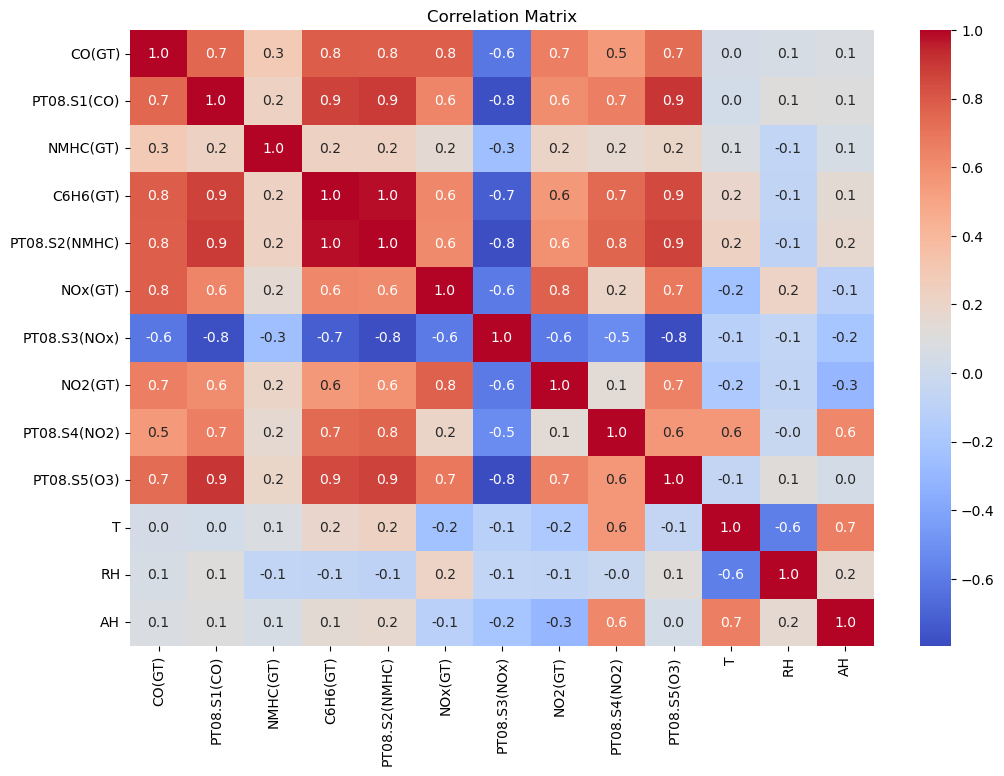

In [ ]:
# Plot a few variables
df[['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']].plot(subplots=True, figsize=(12, 8), title='Pollutant Trends')

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

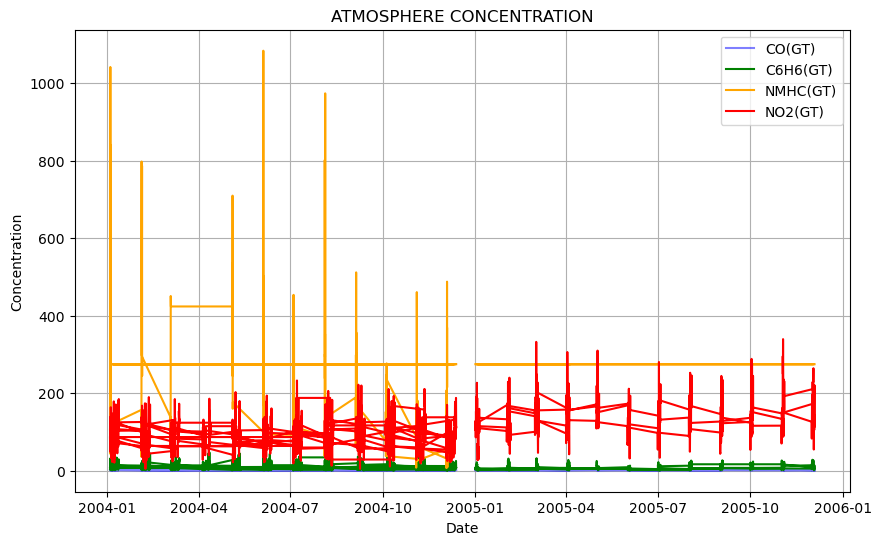

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['CO(GT)'], label='CO(GT)', color='blue', alpha=0.5)
plt.plot(df['C6H6(GT)'], label='C6H6(GT)', color='green')
plt.plot(df['NMHC(GT)'], label='NMHC(GT)', color='orange')
plt.plot(df['NO2(GT)'], label='NO2(GT)', color='red')
plt.title('ATMOSPHERE CONCENTRATION')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Stationarity Test
def adf_test(series):
    result = adfuller(series)
    print('ADF TEST RESULTS')
    print(f'ADF Statstics:{round(result[0],3)}')
    print(f'p value:{round(result[1],3)}')
    print('critical values : ')
    for key,value in result[4].items():
        print(f'{key}:{round(value,3)}')
    if result[1] < 0.05:
        print("=> The series is likely stationary (reject H0)")
    else:
        print("=> The series is likely non-stationary (fail to reject H0)")
    print('-' * 40)
for series in ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']:
    adf_test(df[series])

ADF TEST RESULTS
ADF Statstics:-9.72
p value:0.0
critical values : 
1%:-3.431
5%:-2.862
10%:-2.567
=> The series is likely stationary (reject H0)
----------------------------------------
ADF TEST RESULTS
ADF Statstics:-9.536
p value:0.0
critical values : 
1%:-3.431
5%:-2.862
10%:-2.567
=> The series is likely stationary (reject H0)
----------------------------------------
ADF TEST RESULTS
ADF Statstics:-10.697
p value:0.0
critical values : 
1%:-3.431
5%:-2.862
10%:-2.567
=> The series is likely stationary (reject H0)
----------------------------------------
ADF TEST RESULTS
ADF Statstics:-10.443
p value:0.0
critical values : 
1%:-3.431
5%:-2.862
10%:-2.567
=> The series is likely stationary (reject H0)
----------------------------------------
ADF TEST RESULTS
ADF Statstics:-10.482
p value:0.0
critical values : 
1%:-3.431
5%:-2.862
10%:-2.567
=> The series is likely stationary (reject H0)
----------------------------------------
ADF TEST RESULTS
ADF Statstics:-6.91
p value:0.0
critical 

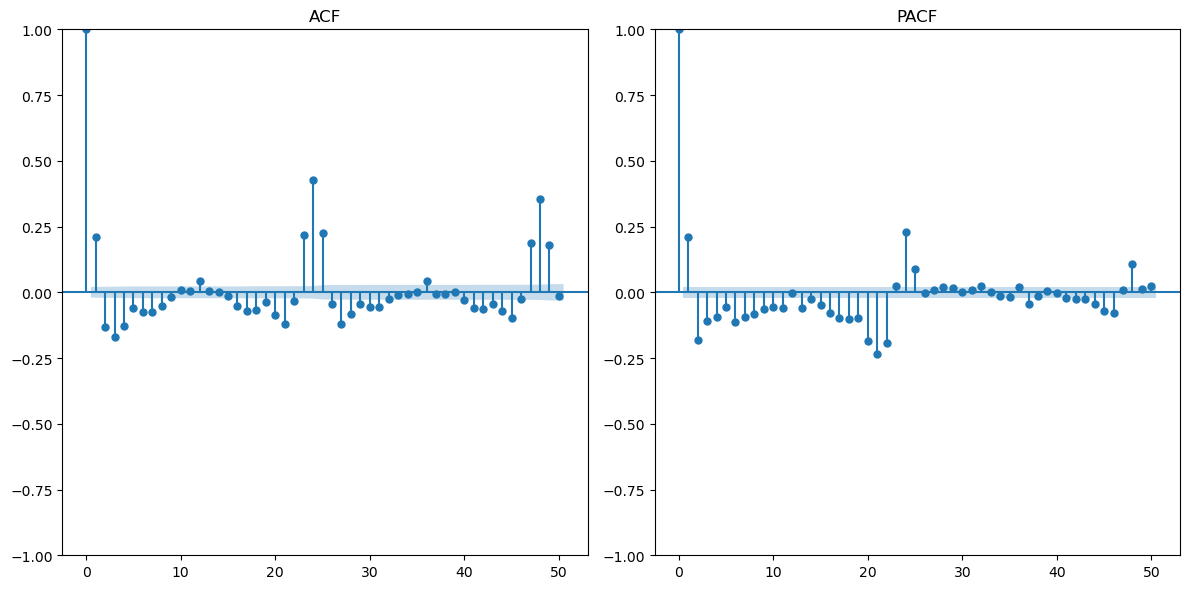

In [ ]:
# AUTOCORELEATION FUNCTION(ACF) AND PARTIAL AUTOCORELEATION FUNCTION (PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(df['CO(GT)'].diff().dropna(), ax=plt.gca(), lags=50)
plt.title('ACF')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(df['CO(GT)'].diff().dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF')

plt.tight_layout()
plt.show()

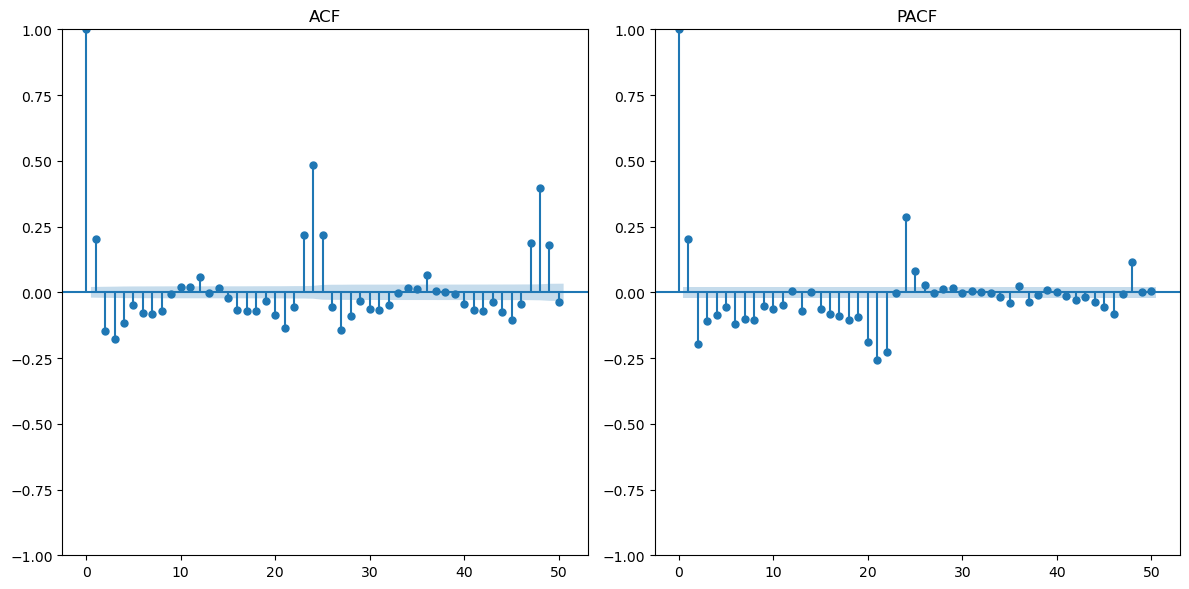

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(df['C6H6(GT)'].diff().dropna(), ax=plt.gca(), lags=50)
plt.title('ACF')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(df['C6H6(GT)'].diff().dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF')

plt.tight_layout()
plt.show()

In [ ]:
# SO p = 2, q = 2  and d = 0

In [ ]:
# Forecasting Function with ARMA
def arma_forecast(series, forecast_horizon=48):
    model = ARIMA(series, order=(2, 0, 2))
    fitted = model.fit()
    forecast = fitted.forecast(steps=forecast_horizon)
    return forecast

# Split Data
split_index = int(len(df) * 0.9)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Forecasting
target_cols = df.columns
forecast_dict = {}
rmse_dict = {}

for col in target_cols:
    print(f"Forecasting {col}...")
    forecast = arma_forecast(train_df[col])
    actual = test_df[col][:48]
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    forecast_dict[col] = forecast
    rmse_dict[col] = rmse
    print(f"  RMSE: {rmse:.2f}")

# RMSE Report
rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=['RMSE'])
print('-' * 40)
print("\nRMSE Summary:")
print(rmse_df)


Forecasting CO(GT)...
  RMSE: 1.08
Forecasting PT08.S1(CO)...
  RMSE: 155.85
Forecasting NMHC(GT)...
  RMSE: 3.08
Forecasting C6H6(GT)...
  RMSE: 5.70
Forecasting PT08.S2(NMHC)...
  RMSE: 209.56
Forecasting NOx(GT)...
  RMSE: 167.60
Forecasting PT08.S3(NOx)...
  RMSE: 179.53
Forecasting NO2(GT)...
  RMSE: 64.48
Forecasting PT08.S4(NO2)...
  RMSE: 372.23
Forecasting PT08.S5(O3)...
  RMSE: 326.92
Forecasting T...
  RMSE: 9.39
Forecasting RH...
  RMSE: 20.02
Forecasting AH...
  RMSE: 0.22
----------------------------------------

RMSE Summary:
                     RMSE
CO(GT)           1.076119
PT08.S1(CO)    155.853315
NMHC(GT)         3.080927
C6H6(GT)         5.696985
PT08.S2(NMHC)  209.556576
NOx(GT)        167.600307
PT08.S3(NOx)   179.528301
NO2(GT)         64.476343
PT08.S4(NO2)   372.232945
PT08.S5(O3)    326.921591
T                9.385967
RH              20.020567
AH               0.224820


In [ ]:
# Forecasting Function with ARIMA
def arima_forecast(series, forecast_horizon=48):
    model = ARIMA(series, order=(2, 1, 2))
    fitted = model.fit()
    forecast = fitted.forecast(steps=forecast_horizon)
    return forecast

# Split Data
split_index = int(len(df) * 0.9)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Forecasting
target_cols = df.columns
forecast_dict = {}
rmse_dict = {}

for col in target_cols:
    print(f"Forecasting {col}...")
    forecast = arima_forecast(train_df[col])
    actual = test_df[col][:48]
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    forecast_dict[col] = forecast
    rmse_dict[col] = rmse
    print(f"  RMSE: {rmse:.2f}")

# RMSE Report
rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=['RMSE'])
print('-' * 40)
print("\nRMSE Summary:")
print(rmse_df)

Forecasting CO(GT)...
  RMSE: 1.17
Forecasting PT08.S1(CO)...
  RMSE: 158.58
Forecasting NMHC(GT)...
  RMSE: 0.00
Forecasting C6H6(GT)...
  RMSE: 5.67
Forecasting PT08.S2(NMHC)...
  RMSE: 216.45
Forecasting NOx(GT)...
  RMSE: 154.01
Forecasting PT08.S3(NOx)...
  RMSE: 163.46
Forecasting NO2(GT)...
  RMSE: 50.93
Forecasting PT08.S4(NO2)...
  RMSE: 207.46
Forecasting PT08.S5(O3)...
  RMSE: 337.14
Forecasting T...
  RMSE: 2.32
Forecasting RH...
  RMSE: 15.65
Forecasting AH...
  RMSE: 0.14
----------------------------------------

RMSE Summary:
                       RMSE
CO(GT)         1.172996e+00
PT08.S1(CO)    1.585846e+02
NMHC(GT)       3.347855e-13
C6H6(GT)       5.674683e+00
PT08.S2(NMHC)  2.164488e+02
NOx(GT)        1.540050e+02
PT08.S3(NOx)   1.634582e+02
NO2(GT)        5.092584e+01
PT08.S4(NO2)   2.074583e+02
PT08.S5(O3)    3.371434e+02
T              2.315282e+00
RH             1.565172e+01
AH             1.430385e-01


In [ ]:
pollutants = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']

# Dictionary to store RMSEs
rmse_results = {}

for pollutant in pollutants:
    # Prepare the dataframe for Prophet
    prophet_df = df[[pollutant]].reset_index()
    prophet_df.columns = ['ds', 'y']
    prophet_df = prophet_df.dropna(subset=['ds', 'y'])

    # Train-test split
    split_index = int(len(prophet_df) * 0.9)
    train_prophet = prophet_df.iloc[:split_index]
    test_prophet = prophet_df.iloc[split_index:]

    # Train the Prophet model
    model_p = Prophet()
    model_p.fit(train_prophet)

    # Create future dataframe
    future = model_p.make_future_dataframe(periods=48, freq='H', include_history=True)

    # Forecast
    forecast_p = model_p.predict(future)

    # Calculate RMSE
    forecast_vals = forecast_p[['ds', 'yhat']].iloc[-48:]['yhat'].values
    actual_vals = test_prophet['y'][:48].values

    rmse = np.sqrt(mean_squared_error(actual_vals, forecast_vals))
    rmse_results[pollutant] = rmse

# Print RMSEs for all series
for pollutant, rmse in rmse_results.items():
    print(f"Prophet RMSE for {pollutant}: {rmse:.2f}")

20:51:29 - cmdstanpy - INFO - Chain [1] start processing
20:51:29 - cmdstanpy - INFO - Chain [1] done processing
20:51:30 - cmdstanpy - INFO - Chain [1] start processing
20:51:30 - cmdstanpy - INFO - Chain [1] done processing
20:51:31 - cmdstanpy - INFO - Chain [1] start processing
20:51:32 - cmdstanpy - INFO - Chain [1] done processing
20:51:33 - cmdstanpy - INFO - Chain [1] start processing
20:51:33 - cmdstanpy - INFO - Chain [1] done processing
20:51:34 - cmdstanpy - INFO - Chain [1] start processing
20:51:34 - cmdstanpy - INFO - Chain [1] done processing
20:51:35 - cmdstanpy - INFO - Chain [1] start processing
20:51:36 - cmdstanpy - INFO - Chain [1] done processing
20:51:37 - cmdstanpy - INFO - Chain [1] start processing
20:51:37 - cmdstanpy - INFO - Chain [1] done processing
20:51:38 - cmdstanpy - INFO - Chain [1] start processing
20:51:38 - cmdstanpy - INFO - Chain [1] done processing
20:51:39 - cmdstanpy - INFO - Chain [1] start processing
20:51:40 - cmdstanpy - INFO - Chain [1]

Prophet RMSE for CO(GT): 1.69
Prophet RMSE for PT08.S1(CO): 405.89
Prophet RMSE for NMHC(GT): 15.07
Prophet RMSE for C6H6(GT): 9.31
Prophet RMSE for PT08.S2(NMHC): 373.37
Prophet RMSE for NOx(GT): 253.47
Prophet RMSE for PT08.S3(NOx): 422.78
Prophet RMSE for NO2(GT): 60.48
Prophet RMSE for PT08.S4(NO2): 395.97
Prophet RMSE for PT08.S5(O3): 781.38
Prophet RMSE for T: 4.45
Prophet RMSE for RH: 29.99
Prophet RMSE for AH: 0.26


In [ ]:
# MIN value of RMSE is given by ARIMA MODEL.
#Prophet model gives RMSE values that are out of range.
#so,I go for ARIMA Model.

20:52:13 - cmdstanpy - INFO - Chain [1] start processing
20:52:13 - cmdstanpy - INFO - Chain [1] done processing


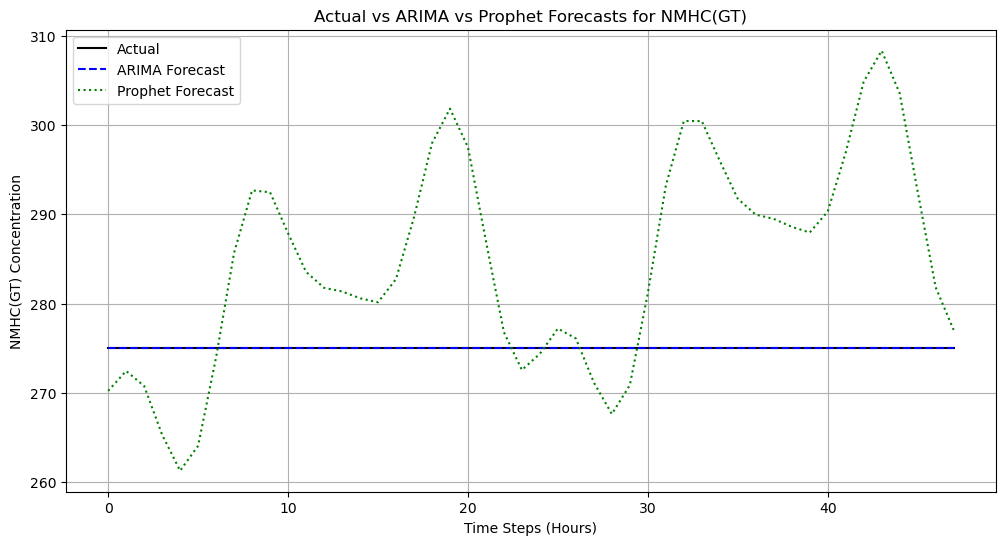

In [ ]:
# Prepare Prophet data
prophet_df = df[['NMHC(GT)']].reset_index()
prophet_df.columns = ['ds', 'y']

# Drop rows where either ds or y is NaN
prophet_df = prophet_df.dropna(subset=['ds', 'y'])

# Train-test split
split_index = int(len(prophet_df) * 0.9)
train_prophet = prophet_df.iloc[:split_index]
test_prophet = prophet_df.iloc[split_index:]

# Fit Prophet model
model_p = Prophet()
model_p.fit(train_prophet)

# Create future dataframe
future = model_p.make_future_dataframe(periods=48, freq='H', include_history=True)

# Forecast with Prophet
forecast_p = model_p.predict(future)
# Prepare ARIMA data
train_arima = train_prophet.set_index('ds')['y']
test_arima = test_prophet.set_index('ds')['y']

# Fit ARIMA model
arima_model = ARIMA(train_arima, order=(2, 1, 2)).fit()

# Forecast with ARIMA
forecast_arima = arima_model.forecast(steps=48).values

# Actual vs Forecast values
forecast_vals = forecast_p[['ds', 'yhat']].iloc[-48:]['yhat'].values
actual_vals = test_arima[:48].values

# Plot
plt.figure(figsize=(12,6))
plt.plot(actual_vals, label='Actual', color='black')
plt.plot(forecast_arima, label='ARIMA Forecast', linestyle='--', color='blue')
plt.plot(forecast_vals, label='Prophet Forecast', linestyle=':', color='green')
plt.legend()
plt.title('Actual vs ARIMA vs Prophet Forecasts for NMHC(GT)')
plt.xlabel('Time Steps (Hours)')
plt.ylabel('NMHC(GT) Concentration')
plt.grid(True)
plt.show()


20:52:25 - cmdstanpy - INFO - Chain [1] start processing
20:52:25 - cmdstanpy - INFO - Chain [1] done processing


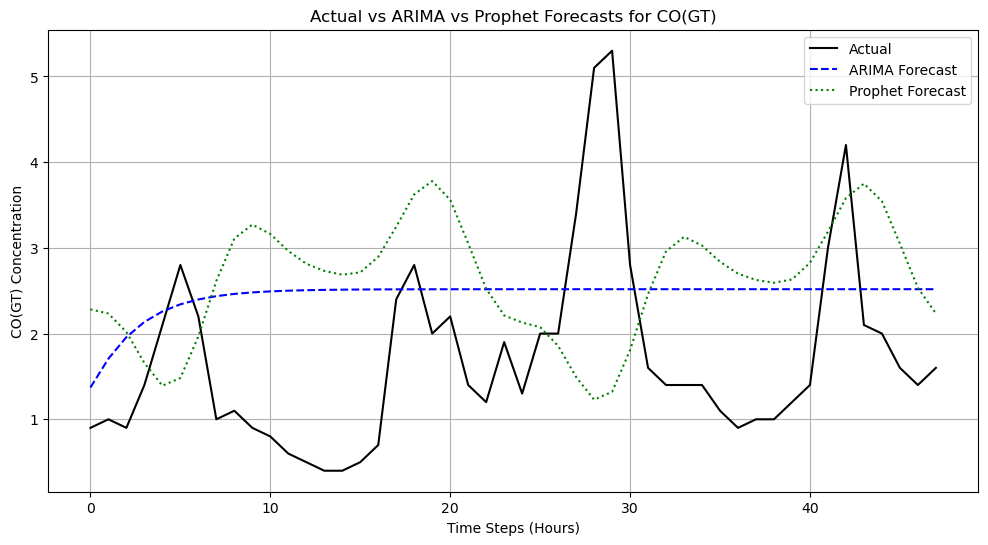

In [ ]:
# Prepare Prophet data
prophet_df = df[['CO(GT)']].reset_index()
prophet_df.columns = ['ds', 'y']

# Drop rows where either ds or y is NaN
prophet_df = prophet_df.dropna(subset=['ds', 'y'])

# Train-test split
split_index = int(len(prophet_df) * 0.9)
train_prophet = prophet_df.iloc[:split_index]
test_prophet = prophet_df.iloc[split_index:]

# Fit Prophet model
model_p = Prophet()
model_p.fit(train_prophet)

# Create future dataframe
future = model_p.make_future_dataframe(periods=48, freq='H', include_history=True)

# Forecast with Prophet
forecast_p = model_p.predict(future)

# Prepare ARIMA data
train_arima = train_prophet.set_index('ds')['y']
test_arima = test_prophet.set_index('ds')['y']

# Fit ARIMA model
arima_model = ARIMA(train_arima, order=(2, 1, 2)).fit()

# Forecast with ARIMA
forecast_arima = arima_model.forecast(steps=48).values

# Actual vs Forecast values
forecast_vals = forecast_p[['ds', 'yhat']].iloc[-48:]['yhat'].values
actual_vals = test_arima[:48].values

# Plot
plt.figure(figsize=(12,6))
plt.plot(actual_vals, label='Actual', color='black')
plt.plot(forecast_arima, label='ARIMA Forecast', linestyle='--', color='blue')
plt.plot(forecast_vals, label='Prophet Forecast', linestyle=':', color='green')
plt.legend()
plt.title('Actual vs ARIMA vs Prophet Forecasts for CO(GT)')
plt.xlabel('Time Steps (Hours)')
plt.ylabel('CO(GT) Concentration')
plt.grid(True)
plt.show()

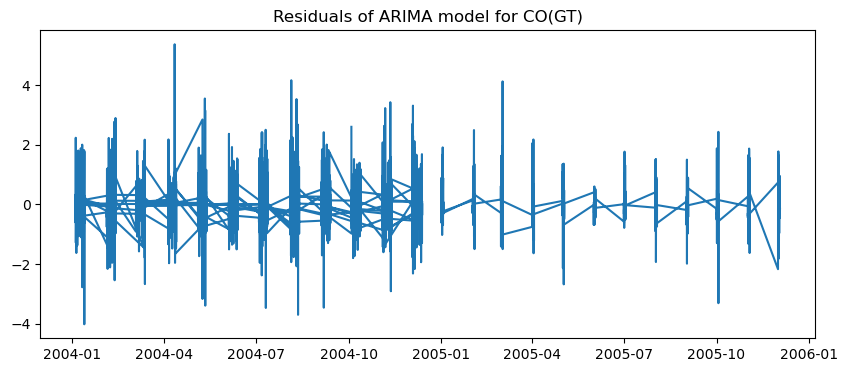

In [ ]:
#RESIDUALS for CO(GT)
model_co = ARIMA(train_df['CO(GT)'], order=(2, 1, 2)).fit()
residuals = model_co.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("Residuals of ARIMA model for CO(GT)")
plt.show()

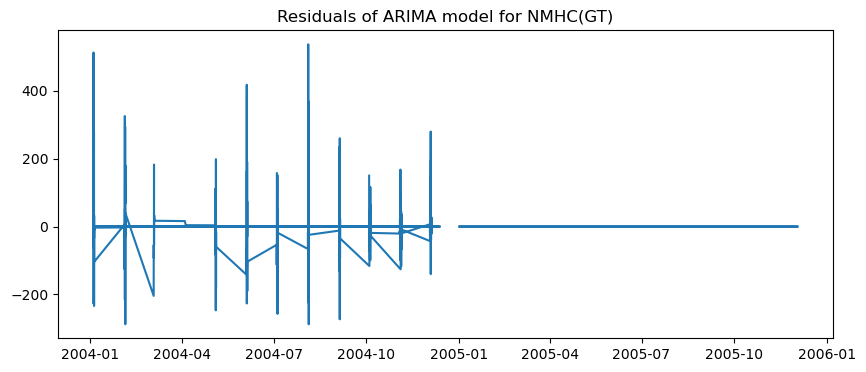

In [ ]:
#Residuals for NMHC(GT)
model_co = ARIMA(train_df['NMHC(GT)'], order=(2, 1, 2)).fit()
residuals = model_co.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("Residuals of ARIMA model for NMHC(GT)")
plt.show()

In [ ]:
# Feature Engineering Insight
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month


In [ ]:
df.head

<bound method NDFrame.head of                      CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                       
2004-10-03 18:00:00     2.6      1360.00     150.0  11.881723        1045.50   
2004-10-03 19:00:00     2.0      1292.25     112.0   9.397165         954.75   
2004-10-03 20:00:00     2.2      1402.00      88.0   8.997817         939.25   
2004-10-03 21:00:00     2.2      1375.50      80.0   9.228796         948.25   
2004-10-03 22:00:00     1.6      1272.25      51.0   6.518224         835.50   
...                     ...          ...       ...        ...            ...   
2005-04-04 10:00:00     3.1      1314.25     275.0  13.529605        1101.25   
2005-04-04 11:00:00     2.4      1162.50     275.0  11.355157        1027.00   
2005-04-04 12:00:00     2.4      1142.00     275.0  12.374538        1062.50   
2005-04-04 13:00:00     2.1      1002.50     275.0   9.547187         960.50   
2005-04-04

In [ ]:
submission = pd.DataFrame({'Variable': list(rmse_dict.keys()), 'RMSE': list(rmse_dict.values())})
submission.to_csv('RMSE submission.csv', index=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
pollutants = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)',
              'PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)',
              'NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)',
              'T','RH','AH']

forecast_results = {}

# Loop through each pollutant
for pollutant in pollutants:
    print(f"Processing {pollutant}...")
    # Drop NaNs
    df_pollutant = df.dropna(subset=[pollutant])

    # Train-test split
    split_index = int(len(df_pollutant) * 0.9)
    train = df_pollutant[pollutant].iloc[:split_index]
    test = df_pollutant[pollutant].iloc[split_index:]

    # Fit ARIMA model
    try:
        model = ARIMA(train, order=(2,1,2))
        model_fit = model.fit()
        # Forecast next 48 steps
        forecast_vals = model_fit.forecast(steps=48).values
        # Store forecasted values
        forecast_results[pollutant] = np.round(forecast_vals, 3)
    except Exception as e:
        print(f"Error processing {pollutant}: {e}")

# Create DataFrame from forecasts
forecast_df = pd.DataFrame(forecast_results)

# Start from the last timestamp in the original dataset
start_time = df.index[-1] + pd.Timedelta(hours=1)  # start forecasting after the last known time
future_dates = pd.date_range(start=start_time, periods=48, freq='H')

# Insert Date and Time columns
forecast_df.insert(0, 'Date', future_dates.date)
forecast_df.insert(1, 'Time', future_dates.time)

# Save to CSV
forecast_df.to_csv('forecasts_submission_file.csv', index=False)



Processing CO(GT)...
Processing PT08.S1(CO)...
Processing NMHC(GT)...
Processing C6H6(GT)...
Processing PT08.S2(NMHC)...
Processing NOx(GT)...
Processing PT08.S3(NOx)...
Processing NO2(GT)...
Processing PT08.S4(NO2)...
Processing PT08.S5(O3)...
Processing T...
Processing RH...
Processing AH...
